In [28]:
import numpy as np



# Sample in Numpy Docs

https://numpy.org/doc/stable/f2py/python-usage.html#fortran-90-module-data

In [3]:
%%file moddata.f90
module mod
  integer i
  integer :: x(4)
  real, dimension(2,3) :: a
  real, allocatable, dimension(:,:) :: b 
contains
  subroutine foo
    integer k
    print*, "i=",i
    print*, "x=[",x,"]"
    print*, "a=["
    print*, "[",a(1,1),",",a(1,2),",",a(1,3),"]"
    print*, "[",a(2,1),",",a(2,2),",",a(2,3),"]"
    print*, "]"
    print*, "Setting a(1,2)=a(1,2)+3"
    a(1,2) = a(1,2)+3
  end subroutine foo
end module mod

Writing moddata.f90


In [5]:
!f2py -c -m --quiet moddata moddata.f90

In [6]:
import moddata

In [7]:
print(moddata.mod.__doc__)

i : 'i'-scalar
x : 'i'-array(4)
a : 'f'-array(2,3)
b : 'f'-array(-1,-1), not allocated 
foo()

Wrapper for ``foo``.




In [11]:
moddata.mod.i

array(0, dtype=int32)

In [10]:
moddata.mod.x

array([0, 0, 0, 0], dtype=int32)

In [12]:
moddata.mod.a

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [13]:
moddata.mod.b

In [15]:
moddata.mod.foo()

 i=           0
 x=[           0           0           0           0 ]
 a=[
 [   0.00000000     ,   0.00000000     ,   0.00000000     ]
 [   0.00000000     ,   0.00000000     ,   0.00000000     ]
 ]
 Setting a(1,2)=a(1,2)+3


In [16]:
moddata.mod.a

array([[0., 3., 0.],
       [0., 0., 0.]], dtype=float32)

# Use magic command

https://pnavaro.github.io/python-fortran/01.f2py.html

In [18]:
%load_ext fortranmagic

In [19]:
%%fortran 
subroutine euclidian_norm(a,c,n) 
  integer :: n 
  real(8),dimension(n),intent(in) :: a
  !f2py optional , depend(a) :: n=len(a)
  real(8),intent(out) :: c 
  real(8) :: sommec 
  integer :: i
  sommec = 0 
  do i=1,n
    sommec=sommec+a( i )*a( i ) 
  end do
  c = sqrt (sommec) 
end subroutine euclidian_norm

In [20]:
a=[2,3,4]

In [21]:
euclidian_norm(a)

5.385164807134504

In [23]:
a_ar=np.arange(2,5)

In [24]:
euclidian_norm(a_ar)

5.385164807134504

In [26]:
print(euclidian_norm.__doc__)

c = euclidian_norm(a,[n])

Wrapper for ``euclidian_norm``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)

Returns
-------
c : float



# Julia Set
https://pnavaro.github.io/python-fortran/03.julia-set.html#fortran

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (6,6)

In [30]:
%%fortran
subroutine juliaset_fortran(x, y, c, lim, maxit, julia)

    real(8),    intent(in)  :: x(:)
    real(8),    intent(in)  :: y(:)
    complex(8), intent(in)  :: c
    real(8),    intent(in)  :: lim
    integer,    intent(in)  :: maxit
    integer,    intent(out) :: julia(size(x),size(y))

    real(8)    :: zr, zi, limsq, cr, ci, tmp
    integer    :: ite, nx, ny

    nx = size(x)
    ny = size(y)
    limsq = lim * lim
    cr = real(c)
    ci = imag(c)

    do i = 1, nx
       do j = 1, ny   
            zr = x(i)
            zi = y(j)
            ite = 0
            do while (zr*zr+zi*zi < limsq .and. ite < maxit)
                tmp = zr*zr - zi*zi 
                zi = 2*zr*zi + ci
                zr = tmp + cr
                ite = ite + 1
            end do
            julia(j, i) = ite
        end do
    end do


end subroutine juliaset_fortran

In [32]:
nx, ny = 512, 512 # mesh
lim, maxit = 400, 2000 # limits 
vmin, vmax = 0, 200 

x = np.linspace(-1.6, 1.6, nx)
y = np.linspace(-1.6, 1.6, ny)
c = -0.772691322542185 + 0.124281466072787j

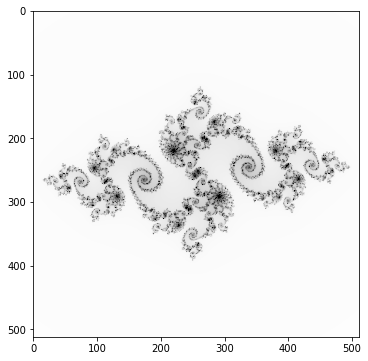

In [37]:
plt.figure(figsize=(6,6))
plt.imshow(juliaset_fortran(x, y, c, lim, maxit), cmap = cm.Greys, vmin=vmin, vmax=vmax)